# Midterm, Part 1

Your midterm has two parts. Make sure you answer part 2 as well. In this part, you will implement the exploratory analysis plan on a college admissions data. Once you're done, upload this notebook on Camino under the Assignment called "Midterm, Part 1" the same way you've been uploading your lab solutions. - Nicholas Fong

### Step 1: Load the python libraries you will need for this project

In [20]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

### Step 2: Read in your data set

In [2]:
# read in data from Camino
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
len(df_raw)

400

Answer: 400

#### Question 2. Create a summary table.

In [21]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger magnitude than GPA, so there is more room for variability. This is probably why GRE has a larger STD than GPA.

#### Question 4. Drop data points with missing data.


In [6]:
df = df_raw.dropna()   #gets rid of empty cells   
len(df)

397

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: The length of the data frame got smaller

#### Question 6. Create box plots for GRE and GPA.

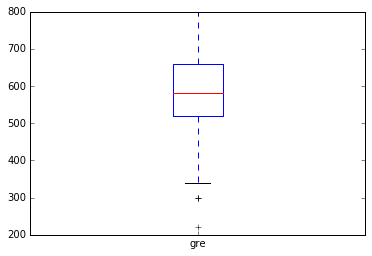

In [8]:
df[ ['gre'] ].plot(kind = 'box')

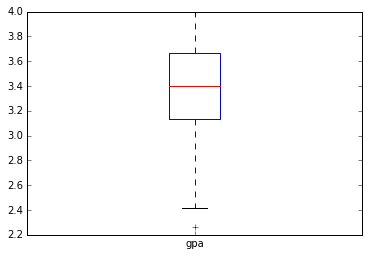

In [9]:
df[ ['gpa'] ].plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: GRE is fairly evenly distributed, although there are a couple of outliers on the low end. GRE is centered around 580. GPA is fairly evenly distributed as well, although there is a large tail on the low end, as well as having an outlier on the low end. GPA is centered around 3.4

#### Question 8. Describe each distribution.

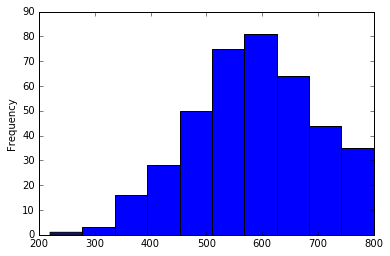

In [13]:
df['gre'].plot(kind='hist')

In [14]:
df.gre.mean()

587.8589420654912

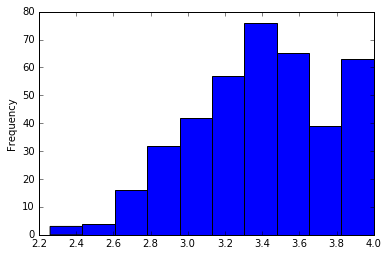

In [11]:
df['gpa'].plot(kind='hist')

In [15]:
df.gpa.mean()

3.3922418136020167

GRE averages at 587.9, and approximates a normal distribution. However, data is skewed with a left tail. GPA averages at 3.39, but has 2 peaks. It also is skewed with a left tail, but has a huge cluster between 3.8 and 4

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

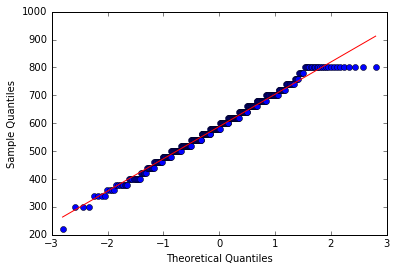

In [18]:
figure = sm.qqplot(df.gre, line = 's')

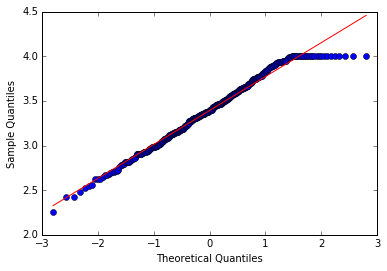

In [17]:
figure = sm.qqplot(df.gpa, line = 's')

Answer: While most of the data almost perfectly fits normality assumptions, the very existence of an upper bound for the data as well as a high number of observations hitting that upper bound skews the data. Overall though, the data for both distributions matches a normal distribution well enough to assume normality.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: If we wanted to remove the ceiling effect in our data, we could remove all values that are equal to its highest value (e.g. get rid of data = 800 for gre and data = 4.0 for gpa). This would make the data fit normality assumptions much better.

#### Question 11. Which of our variables are potentially colinear?

In [19]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There is very little correlation between any of the variables. At best there is a 0.38 correlation between gre and gpa, but that is fairly minor. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: It is noticed that there is a small negative correlation between prestige and admission rates. To explore this, we will plot a linear regression between the 2 variables to see if there is a statistically significant correlation. We can also plot a scatter plot of the data to further examine the association.

#### Question 14. What is your hypothesis?

Answer: H0 is that there is no correlation between prestige and admission. Ha is that there is a negative correlation between prestige and admission.